## 季节性

有时，数据显示出动态行为，即根据特定的时间频率，按照一定的周期重复波动。 这种情况下，时间序列会受到季节性因素的影响。 下面介绍两种提取季节性因素的方法：additive case和multiplicative case 。

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Additive case

假设我们有一个季节性序列，即每年观察4次：

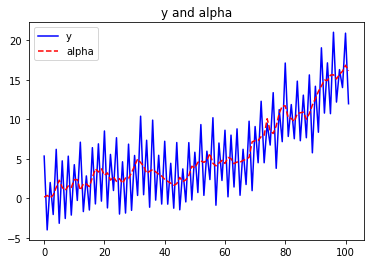

In [16]:
n=102
np.random.seed(1213)
su=.1
se=.5
e=np.sqrt(se)*np.random.randn(n)
u=np.sqrt(se)*np.random.randn(n)
y=np.zeros(n)
alpha=np.zeros(n)
seasfactor=[5,-4,2,-3]
s=4
seasonal=(seasfactor*int(np.ceil(n/s)))[0:n]
y[0]=e[0]+seasonal[0]
alpha[0]=u[0]
for t in range(1,n):
    y[t]=seasonal[t]+alpha[t-1]+e[t]
    alpha[t]=alpha[t-1]+u[t]
plt.plot(y,'b',label="y")
plt.plot(alpha,'r--',label="alpha")
plt.title("y and alpha")
plt.legend()
plt.show()  

一种常用的去除季节性因素的方式是用所谓的移动平均的方法，过程如下：

计算时间序列的中心移动平均，记作$CMA_t$;

用原序列减去$CMA_t$，得到residual；

按照季节将residual中的元素取平均并得到季节性因素；

从$y_t$中减去相应的季节性因素。

下面用一个小例子来说明什么是$CMA_t$。

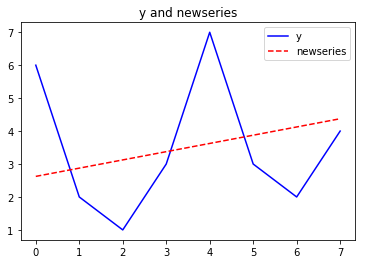

In [128]:
s=4   # 频率
y=[6,2,1,3,7,3,2,4]
n=len(y)
w=[1/(2*s)]*(s+1)
for i in range(1,s):
    w[i]=1/s   # 生成移动平均的权重
cma=np.full([len(y),1], np.nan)   # 生成中心移动平均向量
for i in range(len(y)-s):
    cma[int(i+s/2)]=float(np.dot(w,y[i:i+s+1]))  # 计算中心移动平均向量
residuals=y-cma.reshape(1,len(y))     # 残差
factors=[0]*s
for seas in range(s):
    factors[seas]=np.mean(residuals[0][seas:len(y)-s+seas+1:s][~np.isnan(residuals[0][seas:len(y)-s+seas+1:s])])
for i in range(s):
    factors[i]=factors[i]-np.mean(factors)
# factors=(factors-[np.mean(factors)]*s)
newseries=np.array(y)-np.array((factors*int(np.ceil(n/s)))[0:n])
plt.plot(y,'b',label="y")
plt.plot(newseries,'r--',label="newseries")
plt.title("y and newseries")
plt.legend()
plt.show()  

下面生成一个序列并用上述方法提取其中的季节性因素：

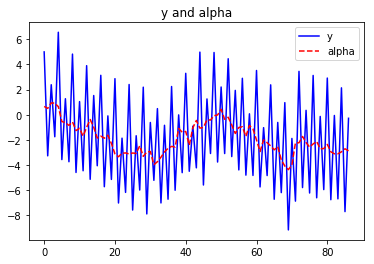

In [134]:
n=87
np.random.seed(1243)
su=.1
se=.3
e=np.sqrt(se)*np.random.randn(n)
u=np.sqrt(se)*np.random.randn(n)
y=np.zeros(n)
alpha=np.zeros(n)
seasfactor=[5,-4,2,-3]
s=4
seasonal=(seasfactor*int(np.ceil(n/s)))[0:n]
y[0]=e[0]+seasonal[0]
alpha[0]=u[0]
for t in range(1,n):
  y[t]=seasonal[t]+alpha[t-1]+e[t]
  alpha[t]=alpha[t-1]+u[t]
plt.plot(y,'b',label="y")
plt.plot(alpha,'r--',label="alpha")
plt.title("y and alpha")
plt.legend()
plt.show() 

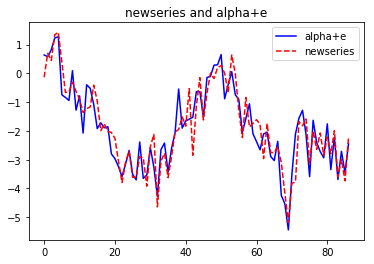

In [135]:
w=[1/(2*s)]*(s+1)
for i in range(1,s):
    w[i]=1/s   # 生成移动平均的权重
cma=np.full([len(y),1], np.nan)   # 生成中心移动平均向量
for i in range(len(y)-s):
    cma[int(i+s/2)]=float(np.dot(w,y[i:i+s+1]))  # 计算中心移动平均向量
residuals=y-cma.reshape(1,len(y))     # 残差
factors=[0]*s
for seas in range(s):
    factors[seas]=np.mean(residuals[0][seas:len(y)-s+seas+1:s][~np.isnan(residuals[0][seas:len(y)-s+seas+1:s])])
for i in range(s):
    factors[i]=factors[i]-np.mean(factors)
# factors=(factors-[np.mean(factors)]*s)
newseries=np.array(y)-np.array((factors*int(np.ceil(n/s)))[0:n])
plt.plot(alpha+e,'b',label="alpha+e")
plt.plot(newseries,'r--',label="newseries")
plt.title("newseries and alpha+e")
plt.legend()
plt.show()  

可以查看计算得到的季节性因素，和实际值十分相符：

In [137]:
print("the estimated seasonal factors:",factors)
print("the true seasonal factors:",seasfactor)

the estimated seasonal factors: [5.1212217446191746, -3.962318043579689, 1.9333312272677499, -3.0909848255944983]
the true seasonal factors: [5, -4, 2, -3]


同样的道理，可以用类似的方法提取multiplicative seasonality。

### Multiplicative seasonality

假设我们有一个季节性序列，即每年观察4次：

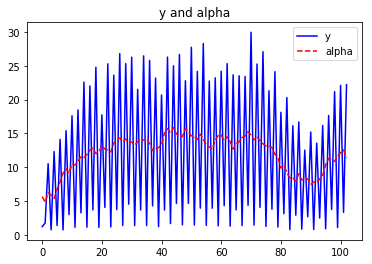

In [141]:
n=103
np.random.seed(0)
su=.4
se=.5
e=np.sqrt(se)*np.random.randn(n)
u=np.sqrt(se)*np.random.randn(n)
y=np.zeros(n)
alpha=np.zeros(n)
seasfactor=[1.7,.3,1.9,.1]
s=4
seasonal=(seasfactor*int(np.ceil(n/s)))[0:n]
y[0]=e[0]
alpha[0]=u[0]+5
for t in range(1,n):
    y[t]=seasonal[t]*(alpha[t-1]+e[t])
    alpha[t]=alpha[t-1]+u[t]
plt.plot(y,'b',label="y")
plt.plot(alpha,'r--',label="alpha")
plt.title("y and alpha")
plt.legend()
plt.show()  

该序列的季节性变化也很显著，但是和additive seasonality不同，季节性因素不再是叠加在状态方程上，而是乘上状态方程，因此会随着时间而扩大。

此处我们仍然使用移动平均的办法来提取季节性因素，但是计算方法略有改变：

计算时间序列的中心移动平均，记作$CMA_t$;

用原序列除以$CMA_t$，得到residual；

按照季节将residual中的元素取平均并得到季节性因素；

从$y_t$中除以相应的季节性因素。

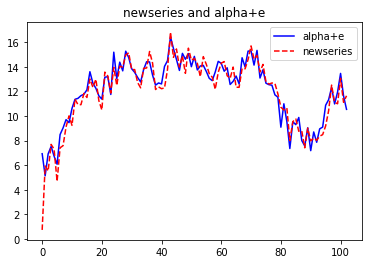

In [143]:
s=4   # 频率
n=len(y)
w=[1/(2*s)]*(s+1)
for i in range(1,s):
    w[i]=1/s   # 生成移动平均的权重
cma=np.full([len(y),1], np.nan)   # 生成中心移动平均向量
for i in range(len(y)-s):
    cma[int(i+s/2)]=float(np.dot(w,y[i:i+s+1]))  # 计算中心移动平均向量
residuals=y/cma.reshape(1,len(y))     # 残差
factors=[0]*s
for seas in range(s):
    factors[seas]=np.mean(residuals[0][seas:len(y)-s+seas+1:s][~np.isnan(residuals[0][seas:len(y)-s+seas+1:s])])
for i in range(s):
    factors[i]=factors[i]/np.mean(factors)
# factors=(factors-[np.mean(factors)]*s)
newseries=np.array(y)/np.array((factors*int(np.ceil(n/s)))[0:n])
plt.plot(alpha+e,'b',label="alpha+e")
plt.plot(newseries,'r--',label="newseries")
plt.title("newseries and alpha+e")
plt.legend()
plt.show()  

In [144]:
print("the estimated seasonal factors:",factors)
print("the true seasonal factors:",seasfactor)

the estimated seasonal factors: [1.691481161662975, 0.30169424756045266, 1.9067938962019171, 0.10161891456547918]
the true seasonal factors: [1.7, 0.3, 1.9, 0.1]


通过上述结果可以看出，去除季节性因素之后，拟合的序列和状态变量十分接近，而且估计得到的季节性因素和实际值差别很小。